# 도전학기 '빅데이터와 인공지능을 활용한 시스템 강건설계' 데이터 챌런지!

#### - 데이터 챌런지 목표 
: 많은 양의 데이터(빅데이터)에서 필요한 정보만 추출(인덱싱)하고, 원하는 형태로 가공할 수 있는 데이터 핸들링 수행능력 평가


#### - 데이터 출처 (일부 데이터 편집) 
: 2015 PHM Conference Data Callenge (https://www.phmsociety.org/events/conference/phm/15/data-challenge)


#### - 가이드에 따라 총 4단계의 데이터 챌런지를 수행하며, 각 단계의 결과값(.csv 데이터 파일)과 최종 코드파일(.ipynb)을 1개 압축파일(.zip)로 제출


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DataFrame 행,열 생략 방지

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',   5000)

# 데이터 불러오기

### A type 데이터와 C type 데이터 불러오기 (site1~70)

In [3]:
for i in range(1,71):
    s1= "site%da = pd.read_csv('Data/site%da.csv', header=None)"%(i,i)
    s2= "site%dc = pd.read_csv('Data/site%dc.csv', header=None)"%(i,i)
    exec(s1)
    exec(s2)
    
    if i%10 == 0:
        print(i)

10
20
30
40
50
60
70


### A type 데이터 (총 70개) 살펴보기
[site1a ~ site70a]

0열 : Component 종류 (HVAC1 ~ HVAC6)  ** HVAC(Heating, Ventilation and Air Conditioning) : 난방, 환기, 냉방 등 공기조화 시스템

1열 : 데이가 샘플링된 시간

2 ~ 5열 : 센서 데이터 1~4

6 ~ 9열 : Control / Operation 데이터 1~4

In [4]:
site4a

,0,1,2,3,4,5,6,7,8,9
0,HVAC1,2009-09-30 13:51:14,694,565,69,641,669,20,40,Occupied
1,HVAC5,2009-09-30 13:51:16,716,531,69,662,689,20,40,Occupied
2,HVAC9,2009-09-30 13:51:17,707,525,69,666,689,20,40,Occupied
3,HVAC2,2009-09-30 13:59:45,700,775,5,508,689,20,40,Occupied
4,HVAC6,2009-09-30 13:59:45,712,837,69,470,689,20,40,Occupied
...,...,...,...,...,...,...,...,...,...,...
1049542,HVAC10,2012-11-09 22:29:51,734,534,69,660,700,40,40,Occupied
1049543,HVAC3,2012-11-09 22:29:53,736,572,0,636,700,40,40,Occupied
1049544,HVAC7,2012-11-09 22:29:54,725,754,5,521,700,40,40,Occupied
1049545,HVAC4,2012-11-09 22:29:59,736,478,68,694,700,40,40,Occupied


### C type 데이터 (총 70개) 살펴보기
[site1c ~ site70c]

0열 : 해당 고장(Fault)이 발생한 구간의 시작 시간 (Start time)

1열 : 해당 고장(Fault)이 발생한 구간의 종료 시간 (End time)

3열 : 고장모드(Fault mode) 이름

In [5]:
site3c

,0,1,2
0,2009-10-07 02:05:22,2009-10-08 10:55:38,NOCOMMS
1,2009-11-04 23:29:35,2009-11-09 09:35:54,NOCOMMS
2,2009-11-13 17:52:31,2009-11-14 00:02:33,NOCOMMS
3,2009-11-16 15:38:10,2009-11-16 17:38:12,NOCOMMS
4,2009-11-20 15:43:37,2009-11-20 16:18:38,NOCOMMS
5,2009-11-24 09:34:37,2009-11-24 09:39:37,NOCOMMS
6,2009-12-03 06:59:53,2009-12-03 07:14:59,PowerFactor
7,2009-12-04 07:00:00,2009-12-04 07:14:47,PowerFactor
8,2009-12-04 13:38:25,2009-12-04 15:33:27,NOCOMMS
9,2009-12-06 06:59:59,2009-12-06 07:14:44,PowerFactor


.

.

.



# [1단계] A type & C type 데이터 인덱싱 (5점)

### * Tip : 데이터 내에서 특정 인덱스(Index)에 해당하는 데이터만 추출하는 방법

예시데이터 (Data frame) 생성

In [6]:
ExampleData = pd.DataFrame( np.transpose(
      [ ['Lee', 'Lee', 'Lee', 'Kim', 'Park'],
        [2013 , 2014 , 2015 , 2016 , 2015  ],
        [1.5  , 1.7  , 3.6  , 2.4  , 2.9   ] ]))

ExampleData

,0,1,2
0,Lee,2013,1.5
1,Lee,2014,1.7
2,Lee,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


name이 'Lee'에 해당하는 데이터만 추출

In [7]:
ExampleData_Lee = ExampleData[  ExampleData[0]=='Lee' ]
ExampleData_Lee

,0,1,2
0,Lee,2013,1.5
1,Lee,2014,1.7
2,Lee,2015,3.6


.

.

.



## A type 데이터 인덱싱
Site1a ~ Site70a 데이터에 대하여 0열(Component)이 HVAC1인 데이터만 인덱싱하여 저장

#### [필수] 인덱싱 후 데이터 (총 70개) 이름(변수명) : 
- site1a_HVAC1 ~ site70a_HVAC1

In [8]:
# 코드 작성
for i in range(1, 71):
    exec('site%da_HVAC1 = site%da[ site%da[0] == "HVAC1" ]'%(i,i,i))


In [9]:
# 데이터 확인 (site1~ 70)
site5a_HVAC1

,0,1,2,3,4,5,6,7,8,9
8,HVAC1,2010-02-06 11:59:53,702,725,5,540,689,20,40,Occupied
11,HVAC1,2010-02-06 12:14:51,727,649,101,588,500,20,40,Occupied
15,HVAC1,2010-02-06 12:29:57,732,646,101,590,500,20,40,Occupied
17,HVAC1,2010-02-06 12:44:54,734,642,101,592,689,20,40,Occupied
20,HVAC1,2010-02-06 12:59:50,729,644,101,591,689,20,40,Occupied
...,...,...,...,...,...,...,...,...,...,...
283651,HVAC1,2012-11-09 21:14:49,712,662,5,580,700,40,40,Occupied
283653,HVAC1,2012-11-09 21:29:55,711,662,5,579,700,40,40,Occupied
283656,HVAC1,2012-11-09 21:45:00,711,662,5,580,700,40,40,Occupied
283657,HVAC1,2012-11-09 21:59:49,711,662,5,579,700,40,40,Occupied


.

.

.



## C type 데이터 인덱싱
site1c ~ site70c 데이터에 대하여, 2열(고장모드) 중 'DeltaT1CoolingZoneInSpec'을 Fault 1 , 'DeltaT1CoolingZoneNotSpec'을 Fault2로 인덱싱

#### [필수] 인덱싱 후 데이터 (총 140개) 이름(변수명) : 
- (Fault 1) site1c_Fault1 ~ site70c_Fault1

- (Fault 2) site1c_Fault2 ~ site70c_Fault2

In [10]:

# 코드 작성
for i in range(1, 71):
    exec('site%dc_Fault1 = site%dc[ site%dc[2] == "DeltaT1CoolingZoneInSpec" ]'%(i,i,i))
    exec('site%dc_Fault2 = site%dc[ site%dc[2] == "DeltaT1CoolingZoneNotSpec" ]'%(i,i,i))

In [11]:
# Fault1 데이터 확인 (site1~ 70)
# (832, 3)으로 shape가 모두 같다..
print(site1c_Fault1.shape)
site1c_Fault1

(832, 3)


,0,1,2
24,2009-09-04 10:44,2009-09-04 11:14,DeltaT1CoolingZoneInSpec
25,2009-09-04 21:44,2009-09-04 21:59,DeltaT1CoolingZoneInSpec
26,2009-09-04 23:00,2009-09-04 23:14,DeltaT1CoolingZoneInSpec
30,2009-09-05 10:44,2009-09-05 11:14,DeltaT1CoolingZoneInSpec
31,2009-09-05 21:29,2009-09-05 23:14,DeltaT1CoolingZoneInSpec
48,2009-09-08 10:45,2009-09-08 12:29,DeltaT1CoolingZoneInSpec
268,2009-11-14 11:44,2009-11-14 13:44,DeltaT1CoolingZoneInSpec
270,2009-11-14 23:00,2009-11-14 23:14,DeltaT1CoolingZoneInSpec
277,2009-11-16 12:44,2009-11-16 12:59,DeltaT1CoolingZoneInSpec
279,2009-11-16 15:59,2009-11-16 16:45,DeltaT1CoolingZoneInSpec


In [12]:
# Fault2 데이터 확인 (site1~ 70)
# (18, 3)으로 shape가 모두 같다..
print(site1c_Fault2.shape)
site1c_Fault2

(18, 3)


,0,1,2
456,2010-05-16 15:59,2010-05-16 21:14,DeltaT1CoolingZoneNotSpec
461,2010-05-17 13:29,2010-05-17 22:45,DeltaT1CoolingZoneNotSpec
492,2010-06-17 17:00,2010-06-17 17:14,DeltaT1CoolingZoneNotSpec
498,2010-06-19 14:14,2010-06-19 20:29,DeltaT1CoolingZoneNotSpec
502,2010-06-20 10:44,2010-06-20 20:44,DeltaT1CoolingZoneNotSpec
507,2010-06-21 16:29,2010-06-21 16:44,DeltaT1CoolingZoneNotSpec
509,2010-06-21 17:14,2010-06-21 17:59,DeltaT1CoolingZoneNotSpec
514,2010-06-22 14:14,2010-06-22 14:29,DeltaT1CoolingZoneNotSpec
516,2010-06-22 14:59,2010-06-22 18:44,DeltaT1CoolingZoneNotSpec
519,2010-06-25 11:44,2010-06-25 11:59,DeltaT1CoolingZoneNotSpec


.

.

.



### 1단계 결과물 체출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [13]:
StudentNo = 98   # 수강생 번호 입력

Path1 = './Result/ST%d_DC1_1'%StudentNo
Path2 = './Result/ST%d_DC1_2'%StudentNo
Path3 = './Result/ST%d_DC1_3'%StudentNo

site70a_HVAC1.to_csv( Path1 , sep=',' , header=None , index=None)
site35c_Fault1.to_csv(Path2 , sep=',' , header=None , index=None)
site10c_Fault2.to_csv(Path3 , sep=',' , header=None , index=None)

.

.

.



# [2단계] 고장모드 별 데이터 인덱싱 (10점)

### * Tip : C type 데이터의 시간정보를 이용해 A type 데이터 인덱싱하는 방법

예시데이터 이용해 c_Fault2 데이터의 첫번째 고장구간에 해당하는 a_HVAC1 데이터의 시작점(StartPoint) 및 끝점(EndPoint) 탐색

In [14]:
Example_site0a_HVAC1  = pd.read_csv('./ExampleData/Example_site0a_HVAC1',header=None)
Example_site0c_Fault2 = pd.read_csv('./ExampleData/Example_site0c_Fault2',header=None)

In [15]:
Example_site0a_HVAC1

,0,1,2,3,4,5,6,7,8,9
0,HVAC1,2010-10-14 19:14:16,757,583,69,630,689,40,40,Occupied
1,HVAC1,2010-10-14 19:14:44,757,583,69,630,689,40,40,Occupied
2,HVAC1,2010-10-14 19:29:48,761,784,5,502,889,40,40,Occupied
3,HVAC1,2010-10-14 19:44:47,777,792,69,498,700,40,40,Occupied
4,HVAC1,2010-10-14 19:59:48,763,570,69,638,689,40,40,Occupied
...,...,...,...,...,...,...,...,...,...,...
72675,HVAC1,2012-11-09 21:29:54,718,714,5,546,689,29,29,Occupied
72676,HVAC1,2012-11-09 21:44:47,703,673,5,573,689,29,29,Occupied
72677,HVAC1,2012-11-09 21:59:38,718,712,5,548,689,29,29,Occupied
72678,HVAC1,2012-11-09 22:14:51,705,673,5,573,689,29,29,Occupied


In [16]:
Example_site0c_Fault2

,0,1,2
0,2011-02-16 18:14:44,2011-02-16 18:44:46,DeltaT1CoolingZoneNotSpec
1,2011-02-18 18:29:59,2011-02-18 18:44:53,DeltaT1CoolingZoneNotSpec
2,2011-02-18 20:14:46,2011-02-18 20:29:55,DeltaT1CoolingZoneNotSpec
3,2011-02-19 16:14:51,2011-02-19 16:59:45,DeltaT1CoolingZoneNotSpec
4,2011-02-19 17:14:58,2011-02-19 17:44:42,DeltaT1CoolingZoneNotSpec
5,2011-02-19 20:14:56,2011-02-19 21:14:54,DeltaT1CoolingZoneNotSpec
6,2011-02-24 17:30:01,2011-02-24 18:14:49,DeltaT1CoolingZoneNotSpec
7,2011-02-26 17:44:56,2011-02-26 17:59:47,DeltaT1CoolingZoneNotSpec
8,2011-02-26 18:14:58,2011-02-26 18:29:47,DeltaT1CoolingZoneNotSpec
9,2011-03-21 13:14:42,2011-03-21 13:29:52,DeltaT1CoolingZoneNotSpec


In [17]:
np.where(Example_site0a_HVAC1.iloc[:,1].values <= Example_site0c_Fault2.iloc[0,0])

(array([    0,     1,     2, ..., 11999, 12000, 12001], dtype=int64),)

In [18]:
np.where(Example_site0a_HVAC1.iloc[:,1].values <= Example_site0c_Fault2.iloc[0,1])

(array([    0,     1,     2, ..., 12001, 12002, 12003], dtype=int64),)

In [19]:
# 수정된 부분입니다. 과제를 진행하실 때, 영상이 아닌 다음 코드를 사용해주시기 바랍니다.
# np.where을 쓰면 처음에 (array, 데이터타입)이 담긴 튜플이 반환되고, 튜플의 0번째(=array)에서의 마지막 원소 가져오기

StartPoint = np.where(Example_site0a_HVAC1.iloc[:,1].values <= Example_site0c_Fault2.iloc[0,0])[0][-1]
EndPoint   = np.where(Example_site0a_HVAC1.iloc[:,1].values <= Example_site0c_Fault2.iloc[0,1])[0][-1]

StartPoint, EndPoint

(12001, 12003)

.

.

.



### Fault 1에 해당하는 구간의 A type (HVAC1) 데이터 추출
- 아래 가이드에 따르지 않고 더 좋은 방법으로 코드 작성해도 결과만 맞으면 무관

#### [필수] 추출 후 데이터 (총 140개) 이름(변수명) : 
- (Fault1구간 추출) site1a_HVAC1_Fault1 ~ site70a_HVAC1_Fault1
- (Fault2구간 추출) site1a_HVAC1_Fault2 ~ site70a_HVAC1_Fault2

In [20]:
for i in range(1, 71):       # 반복구문 1 : 데이터(1~70) 순서대로 코드 실행

    # 반복구문 내에서 사용할 temp_data_a , temp_data_c1 지정
    s1 = 'temp_data_a  =  site%da_HVAC1'%(i)
    s2 = 'temp_data_c1 =  site%dc_Fault1'%(i)
    exec(s1)
    exec(s2)
    
    temp_data_result = pd.DataFrame(columns=range(0,10))
    
    for j in range(temp_data_c1.shape[0]):   # 반복구문 2 : Fault1의 고장구간 개수(temp_data_c1의 행 길이)에 따라 순서대로 코드 실행
        StartPoint = np.where(temp_data_a.iloc[:,1].values <= temp_data_c1.iloc[j,0])[0][-1]
        EndPoint   = np.where(temp_data_a.iloc[:,1].values <= temp_data_c1.iloc[j,1])[0][-1]
        
        temp_data_result = temp_data_result.append(temp_data_a.iloc[StartPoint:EndPoint])
    
    s3 = 'site%da_HVAC1_Fault1 = temp_data_result'%(i)
    exec(s3)
    
    if i%10 == 0:
        print('\n %d번째 데이터의 고장구간 추출 완료'%i)
    
site1a_HVAC1_Fault1


 10번째 데이터의 고장구간 추출 완료

 20번째 데이터의 고장구간 추출 완료

 30번째 데이터의 고장구간 추출 완료

 40번째 데이터의 고장구간 추출 완료

 50번째 데이터의 고장구간 추출 완료

 60번째 데이터의 고장구간 추출 완료

 70번째 데이터의 고장구간 추출 완료


,0,1,2,3,4,5,6,7,8,9
9596,HVAC1,2009-09-04 10:29:41,720,694,5,559,700,20,40,Occupied
9603,HVAC1,2009-09-04 10:44:47,714,698,5,557,700,20,40,Occupied
9861,HVAC1,2009-09-04 21:29:52,716,712,5,548,700,20,40,Occupied
10170,HVAC1,2009-09-05 10:29:34,716,714,5,546,700,20,40,Occupied
10177,HVAC1,2009-09-05 10:44:38,716,714,5,547,700,20,40,Occupied
...,...,...,...,...,...,...,...,...,...,...
672274,HVAC1,2012-11-09 11:59:34,739,691,0,561,700,40,40,Occupied
672280,HVAC1,2012-11-09 12:14:37,712,723,5,541,700,40,40,Occupied
672286,HVAC1,2012-11-09 12:29:37,712,734,5,534,700,40,40,Occupied
672293,HVAC1,2012-11-09 12:44:40,714,739,5,531,700,40,40,Occupied


In [21]:
site1a_HVAC1_Fault1

,0,1,2,3,4,5,6,7,8,9
9596,HVAC1,2009-09-04 10:29:41,720,694,5,559,700,20,40,Occupied
9603,HVAC1,2009-09-04 10:44:47,714,698,5,557,700,20,40,Occupied
9861,HVAC1,2009-09-04 21:29:52,716,712,5,548,700,20,40,Occupied
10170,HVAC1,2009-09-05 10:29:34,716,714,5,546,700,20,40,Occupied
10177,HVAC1,2009-09-05 10:44:38,716,714,5,547,700,20,40,Occupied
...,...,...,...,...,...,...,...,...,...,...
672274,HVAC1,2012-11-09 11:59:34,739,691,0,561,700,40,40,Occupied
672280,HVAC1,2012-11-09 12:14:37,712,723,5,541,700,40,40,Occupied
672286,HVAC1,2012-11-09 12:29:37,712,734,5,534,700,40,40,Occupied
672293,HVAC1,2012-11-09 12:44:40,714,739,5,531,700,40,40,Occupied


고장모드 2에 대해서도 동일하게 수행

In [22]:
for i in range(1, 71):       # 반복구문 1 : 데이터(1~70) 순서대로 코드 실행

    # 반복구문 내에서 사용할 temp_data_a , temp_data_c1 지정
    s1 = 'temp_data_a  =  site%da_HVAC1'%(i)
    s2 = 'temp_data_c1 =  site%dc_Fault2'%(i)
    exec(s1)
    exec(s2)
    
    temp_data_result = pd.DataFrame(columns=range(0,10))
    
    for j in range(temp_data_c1.shape[0]):   # 반복구문 2 : Fault1의 고장구간 개수(temp_data_c1의 행 길이)에 따라 순서대로 코드 실행
        StartPoint = np.where(temp_data_a.iloc[:,1].values <= temp_data_c1.iloc[j,0])[0][-1]
        EndPoint   = np.where(temp_data_a.iloc[:,1].values <= temp_data_c1.iloc[j,1])[0][-1]
        
        temp_data_result = temp_data_result.append(temp_data_a.iloc[StartPoint:EndPoint])
    
    s3 = 'site%da_HVAC1_Fault2 = temp_data_result'%(i)
    exec(s3)
    
    if i%10 == 0:
        print('\n %d번째 데이터의 고장구간 추출 완료'%i)
    
site1a_HVAC1_Fault2


 10번째 데이터의 고장구간 추출 완료

 20번째 데이터의 고장구간 추출 완료

 30번째 데이터의 고장구간 추출 완료

 40번째 데이터의 고장구간 추출 완료

 50번째 데이터의 고장구간 추출 완료

 60번째 데이터의 고장구간 추출 완료

 70번째 데이터의 고장구간 추출 완료


,0,1,2,3,4,5,6,7,8,9
152510,HVAC1,2010-05-16 15:44:51,700,729,5,537,689,29,29,Occupied
152514,HVAC1,2010-05-16 15:59:40,711,743,5,528,689,29,29,Occupied
152520,HVAC1,2010-05-16 16:14:50,709,741,5,529,689,29,29,Occupied
152524,HVAC1,2010-05-16 16:29:40,703,727,5,539,689,29,29,Occupied
152532,HVAC1,2010-05-16 16:45:00,711,738,5,532,689,29,29,Occupied
152535,HVAC1,2010-05-16 16:59:49,711,642,69,592,689,29,29,Occupied
152539,HVAC1,2010-05-16 17:14:39,711,738,5,532,689,29,29,Occupied
152547,HVAC1,2010-05-16 17:29:59,709,626,69,602,689,29,29,Occupied
152550,HVAC1,2010-05-16 17:44:49,702,736,5,533,689,29,29,Occupied
152554,HVAC1,2010-05-16 17:59:37,721,604,69,616,689,29,29,Occupied


In [23]:
site1a_HVAC1_Fault2

,0,1,2,3,4,5,6,7,8,9
152510,HVAC1,2010-05-16 15:44:51,700,729,5,537,689,29,29,Occupied
152514,HVAC1,2010-05-16 15:59:40,711,743,5,528,689,29,29,Occupied
152520,HVAC1,2010-05-16 16:14:50,709,741,5,529,689,29,29,Occupied
152524,HVAC1,2010-05-16 16:29:40,703,727,5,539,689,29,29,Occupied
152532,HVAC1,2010-05-16 16:45:00,711,738,5,532,689,29,29,Occupied
152535,HVAC1,2010-05-16 16:59:49,711,642,69,592,689,29,29,Occupied
152539,HVAC1,2010-05-16 17:14:39,711,738,5,532,689,29,29,Occupied
152547,HVAC1,2010-05-16 17:29:59,709,626,69,602,689,29,29,Occupied
152550,HVAC1,2010-05-16 17:44:49,702,736,5,533,689,29,29,Occupied
152554,HVAC1,2010-05-16 17:59:37,721,604,69,616,689,29,29,Occupied


.

.

.



.

.

.



### 추출된 데이터(총 140개)의 사이즈(shape) 확인 (코드수정x)

In [24]:
DataSize_Fault1= pd.DataFrame(site1a_HVAC1_Fault1.shape)

for i in range(2,71):
    s = 'DataSize_Fault1_add = pd.DataFrame(site%da_HVAC1_Fault1.shape)'%i
    exec(s)
    DataSize_Fault1 = pd.DataFrame(np.concatenate([DataSize_Fault1 , DataSize_Fault1_add], axis=1))
    
DataSize_Fault1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,5550,14952,7968,7968,1742,6707,6707,6475,9396,4726,616,1651,3155,15609,6475,4726,6475,3574,11636,419,507,11636,5008,419,11941,5008,4545,3948,9476,4545,3948,13092,2853,1026,10998,2853,24839,5389,1688,5142,6668,18075,974,6407,24839,9476,5142,77317,7347,974,10400,10400,8,8,10998,2686,5008,919,5389,4791,919,2686,10998,7347,2686,24839,919,974,5142,10400
1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [25]:
DataSize_Fault2= pd.DataFrame(site1a_HVAC1_Fault2.shape)

for i in range(2,71):
    s = 'DataSize_Fault2_add = pd.DataFrame(site%da_HVAC1_Fault2.shape)'%i
    exec(s)
    DataSize_Fault2 = pd.DataFrame(np.concatenate([DataSize_Fault2 , DataSize_Fault2_add], axis=1))
    
DataSize_Fault2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,247,239,29,29,318,255,255,1522,452,160,234,27,4224,3048,1522,160,1522,315,3574,29,390,3574,19,29,657,19,1686,1405,564,1686,1405,2904,28,10,1119,28,4901,1651,7906,18,1177,1270,1325,197,4901,564,18,24226,202,1325,228,228,2700,2700,1119,201,19,598,1651,2741,598,201,1119,202,201,4901,598,1325,18,228
1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


.

.

.



### 2단계 결과물 체출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [26]:
# 수정된 부분입니다. 과제를 진행하실 때, 영상이 아닌 다음 코드를 사용해주시기 바랍니다.
# StudentNo = 0   # 수강생 번호 입력

Path1 = './Result/ST%d_DC2_1'%StudentNo
Path2 = './Result/ST%d_DC2_2'%StudentNo
Path3 = './Result/ST%d_DC2_3'%StudentNo
Path4 = './Result/ST%d_DC2_4'%StudentNo

site35a_HVAC1_Fault1.to_csv( Path1 , sep=',' , header=None , index=None)
site45a_HVAC1_Fault2.to_csv( Path2 , sep=',' , header=None , index=None)
DataSize_Fault1.to_csv(      Path3 , sep=',' , header=None , index=None)
DataSize_Fault2.to_csv(      Path4 , sep=',' , header=None , index=None)

.

.

.



# 3단계 데이터 특징 추출 (5점)

2단계에서 추출한 140개 데이터에 대하여 각 센서(열) 별로 아래 5개 특징값 순서대로 추출
- Max(최대값), Min(최소값), Mean(평균값), RMS(제곱평균제곱근), Variance(분산) 순서대로

In [27]:
def rms(x): # RMS 함수 정의
    return np.sqrt(np.mean(x**2))


#### [필수] 추출 후 특징데이터 (총 2개) 이름(변수명) : 
- (Fault1 특징데이터) FeatureData_Fault1
- (Fault2 특징데이터) FeatureData_Fault2

In [28]:
# 특징데이터 크기 지정
NoOfSensor  = 4
NoOfFeature = 5
NoOfData    = 70


# 특징추출 코드 작성

# shape = (4개 센서 * 특징 5개, 70개 데이터)
sensorIndexStart = 2

FeatureData_Fault1 = np.zeros(shape=(NoOfSensor*NoOfFeature , NoOfData))
FeatureData_Fault2 = np.zeros(shape=(NoOfSensor*NoOfFeature , NoOfData))

for i in range(NoOfData):
    
    s1 = 'fault1_data = site%da_HVAC1_Fault1.to_numpy()'%(i+1)
    s2 = 'fault2_data = site%da_HVAC1_Fault2.to_numpy()'%(i+1)
    exec(s1)
    exec(s2)
    
    for j in range(NoOfSensor):
        
        FeatureData_Fault1[ j*NoOfFeature+0 , i ] = np.max(fault1_data[:,sensorIndexStart+j])
        FeatureData_Fault1[ j*NoOfFeature+1 , i ] = np.min(fault1_data[:,sensorIndexStart+j])
        FeatureData_Fault1[ j*NoOfFeature+2 , i ] = np.mean(fault1_data[:,sensorIndexStart+j])
        FeatureData_Fault1[ j*NoOfFeature+3 , i ] = rms(fault1_data[:,sensorIndexStart+j])
        FeatureData_Fault1[ j*NoOfFeature+4 , i ] = np.var(fault1_data[:,sensorIndexStart+j])
        
        FeatureData_Fault2[ j*NoOfFeature+0 , i ] = np.max(fault2_data[:,sensorIndexStart+j])
        FeatureData_Fault2[ j*NoOfFeature+1 , i ] = np.min(fault2_data[:,sensorIndexStart+j])
        FeatureData_Fault2[ j*NoOfFeature+2 , i ] = np.mean(fault2_data[:,sensorIndexStart+j])
        FeatureData_Fault2[ j*NoOfFeature+3 , i ] = rms(fault2_data[:,sensorIndexStart+j])
        FeatureData_Fault2[ j*NoOfFeature+4 , i ] = np.var(fault2_data[:,sensorIndexStart+j])


        
print(FeatureData_Fault1.shape) # (20,70)이 맞는지 확인
print(FeatureData_Fault2.shape) # (20,70)이 맞는지 확인

(20, 70)
(20, 70)


.

.

.



### Data frame 형식으로 변환 및 데이터 확인 (코드수정x)

In [29]:
FeatureData_Fault1_df = pd.DataFrame(FeatureData_Fault1)
FeatureData_Fault1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,801.000000,777.000000,799.000000,799.000000,801.000000,786.000000,786.000000,788.000000,766.000000,802.000000,761.000000,779.000000,799.000000,795.000000,788.000000,802.000000,788.000000,793.000000,813.000000,802.000000,847.000000,813.000000,788.000000,802.000000,869.000000,788.000000,892.000000,788.000000,804.000000,892.000000,788.000000,802.000000,759.000000,781.000000,829.000000,759.000000,817.000000,811.000000,1024.000000,801.000000,792.000000,797.000000,889.000000,763.000000,817.000000,804.000000,801.000000,961.000000,775.000000,889.000000,797.000000,797.000000,810.000000,810.000000,829.000000,783.000000,788.000000,775.000000,811.000000,1080.000000,775.000000,783.000000,829.000000,775.000000,783.000000,817.000000,775.000000,889.000000,801.000000,797.000000
1,671.000000,698.000000,671.000000,671.000000,673.000000,689.000000,689.000000,671.000000,694.000000,707.000000,694.000000,689.000000,676.000000,698.000000,671.000000,707.000000,671.000000,691.000000,676.000000,720.000000,723.000000,676.000000,671.000000,720.000000,565.000000,671.000000,541.000000,712.000000,687.000000,541.000000,712.000000,685.000000,698.000000,721.000000,608.000000,698.000000,716.000000,671.000000,599.000000,680.000000,703.000000,685.000000,716.000000,685.000000,716.000000,687.000000,680.000000,635.000000,712.000000,716.000000,698.000000,698.000000,772.000000,772.000000,608.000000,700.000000,671.000000,714.000000,671.000000,653.000000,714.000000,700.000000,608.000000,712.000000,700.000000,716.000000,714.000000,716.000000,680.000000,698.000000
2,726.764865,727.660246,721.525979,721.525979,725.951780,730.631430,730.631430,725.608958,730.881545,775.778883,721.769481,727.735312,720.309033,733.753219,725.608958,775.778883,725.608958,720.761332,728.666122,743.761337,755.731755,728.666122,733.366613,743.761337,726.790135,733.366613,751.529813,733.325228,727.999789,751.529813,733.325228,730.841735,722.618998,745.320663,719.832879,722.618998,740.774508,732.499165,779.312796,720.323415,729.295441,724.553306,756.207392,730.213829,740.774508,727.999789,720.323415,740.271790,740.126446,756.207392,733.678365,733.678365,792.500000,792.500000,719.832879,727.075577,733.366613,728.090316,732.499165,812.869756,728.090316,727.075577,719.832879,740.126446,727.075577,740.774508,728.090316,756.207392,720.323415,733.678365
3,726.953558,727.745684,721.632986,721.632986,726.093299,730.788807,730.788807,725.725370,730.917978,776.268197,721.799946,727.832518,720.393333,733.881505,725.725370,776.268197,725.725370,720.862406,728.822511,744.039042,756.195554,728.822511,733.470750,744.039042,727.149985,733.470750,753.569037,733.355876,728.186135,753.569037,733.355876,731.040571,722.723971,745.391046,720.586474,722.723971,740.994118,732.817774,782.239337,720.446632,729.423212,724.604379,757.236449,730.273084,740.994118,728.186135,720.446632,741.017405,740.248743,757.236449,733.899605,733.899605,792.615764,792.615764,720.586474,727.181036,733.470750,728.152947,732.817774,818.982983,728.152947,727.181036,720.586474,740.248743,727.181036,740.994118,728.152947,757.236449,720.446632,733.899605
4,274.306333,124.347114,154.427538,154.427538,205.492508,229.994766,229.994766,168.952877,53.257680,759.438411,43.979328,141.489601,121.450933,188.276597,168.952877,759.438411,168.952877,145.711085,227.935363,413.169770,701.229820,227.935363,152.751777,413.169770,523.200408,152.751777,3069.233930,44.951471,271.353947,3069.233930,44.951471,290.673852,151.721995,104.921542,1085.493620,151.721995,325.411652,466.862729,4569.945997,177.527258,186.381521,74.013576,1557.419001,86.542072,325.411652,271.353947,177.527258,1104.471599,181.044716,1557.419001,324.685686,324.685686,183.500000,183.500000,1085.493620,153.364727,152.751777,91.207295,466.862729,9975.887023,91.207295,153.364727,1085.493620,181.044716,1

In [30]:
FeatureData_Fault2_df = pd.DataFrame(FeatureData_Fault2)
FeatureData_Fault2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,797.000000,777.000000,741.000000,741.000000,784.000000,790.000000,790.000000,792.000000,756.000000,799.000000,732.000000,739.000000,797.000000,795.000000,792.000000,799.000000,792.000000,781.000000,819.000000,840.000000,892.000000,819.000000,734.000000,840.000000,810.000000,734.000000,801.000000,779.000000,846.000000,801.000000,779.000000,801.000000,793.000000,730.000000,828.000000,793.000000,831.000000,815.000000,1229.000000,784.000000,813.000000,745.000000,914.000000,774.000000,831.000000,846.000000,784.000000,961.000000,759.000000,914.000000,792.000000,792.000000,824.000000,824.000000,828.000000,783.000000,734.000000,759.000000,815.000000,1072.000000,759.000000,783.000000,828.000000,759.000000,783.000000,831.000000,759.000000,914.000000,784.000000,792.000000
1,693.000000,716.000000,725.000000,725.000000,712.000000,707.000000,707.000000,666.000000,727.000000,721.000000,714.000000,718.000000,687.000000,720.000000,666.000000,721.000000,666.000000,707.000000,689.000000,770.000000,725.000000,689.000000,716.000000,770.000000,703.000000,716.000000,558.000000,691.000000,712.000000,558.000000,691.000000,694.000000,714.000000,727.000000,711.000000,714.000000,750.000000,687.000000,734.000000,732.000000,709.000000,682.000000,743.000000,732.000000,750.000000,712.000000,732.000000,707.000000,718.000000,743.000000,716.000000,716.000000,743.000000,743.000000,711.000000,698.000000,716.000000,712.000000,687.000000,718.000000,712.000000,698.000000,711.000000,718.000000,698.000000,750.000000,712.000000,743.000000,732.000000,716.000000
2,712.137652,760.564854,732.689655,732.689655,757.028302,747.592157,747.592157,726.114323,738.747788,754.550000,722.811966,724.074074,728.355824,752.300853,726.114323,754.550000,726.114323,734.669841,740.761612,798.379310,801.841026,740.761612,726.631579,798.379310,726.497717,726.631579,692.747924,735.652669,758.423759,692.747924,735.652669,728.357438,728.035714,728.400000,771.830206,728.035714,782.898184,758.777105,938.092714,763.666667,764.163127,715.759055,836.825660,750.116751,782.898184,758.423759,763.666667,780.084001,729.153465,836.825660,747.714912,747.714912,789.677407,789.677407,771.830206,725.388060,726.631579,731.254181,758.777105,861.124407,731.254181,725.388060,771.830206,729.153465,725.388060,782.898184,731.254181,836.825660,763.666667,747.714912
3,712.181259,760.634658,732.701238,732.701238,757.133578,747.743974,747.743974,726.266443,738.787742,754.706971,722.824877,724.087062,728.581497,752.447048,726.266443,754.706971,726.266443,734.916419,741.418015,798.578586,803.580934,741.418015,726.645429,798.578586,726.595040,726.645429,693.603416,735.775988,758.870833,693.603416,735.775988,728.485073,728.204470,728.401400,772.626624,728.204470,783.058659,759.335196,942.407081,763.872881,764.451313,715.804732,837.474422,750.194347,783.058659,758.870833,763.872881,781.424973,729.171763,837.474422,747.881373,747.881373,789.780556,789.780556,772.626624,725.559297,726.645429,731.309631,759.335196,864.762538,731.309631,725.559297,772.626624,729.171763,725.559297,783.058659,731.309631,837.474422,763.872881,747.881373
4,62.110607,106.187217,16.972652,16.972652,159.404859,227.017978,227.017978,220.935682,59.033734,236.910000,18.665498,18.809328,328.791713,219.985931,220.935682,236.910000,220.935682,362.367186,972.907916,318.235434,2793.287548,972.907916,20.127424,318.235434,141.418945,20.127424,1186.012970,181.455162,678.343478,1186.012970,181.455162,185.944552,245.748724,2.040000,1230.033726,245.748724,251.296102,847.245290,8113.165323,315.000000,440.525641,65.389190,1086.220926,116.417841,251.296102,678.343478,315.000000,2093.940232,26.684369,1086.220926,248.958199,248.958199,162.919267,162.919267,1230.033726,248.456375,20.127424,81.099272,847.245290,6279.002764,81.099272,248.456375,1230.033726,26.684369,248.4563

.

.

.



### 3단계 결과물 체출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [31]:
# StudentNo = 98   # 수강생 번호 입력

Path1 = './Result/ST%d_DC3_1'%StudentNo
Path2 = './Result/ST%d_DC3_2'%StudentNo

FeatureData_Fault1_df.to_csv( Path1 , sep=',' , header=None , index=None)
FeatureData_Fault2_df.to_csv( Path2 , sep=',' , header=None , index=None)

.

.

.



# 4단계 t-Test 기반 P-value < 0.01 인 주요 특징 선택 (10점)

In [32]:
import seaborn           as sb
import scipy.stats       as sp

- 3단계의 FeatureData_Fault1_df 및 FeatureData_Fault2_df 데이터 활용하여 특징별 P-value 계산

In [35]:
NoOfData    = int(FeatureData_Fault1_df.shape[1])  # 데이터 개수
NoOfFeature = int(FeatureData_Fault1_df.shape[0])  # 특징 개수

# P-value 추출 코드 작성
P_value = np.zeros((NoOfFeature, 2))

for i in range(NoOfFeature):
    
    # 가로줄 하나하나씩(=한 특징에서의 모든 데이터) Fault1과 Fault2로 t-Test 수행
    T_test = np.array(sp.ttest_ind(FeatureData_Fault1_df.iloc[i,:], FeatureData_Fault2_df.iloc[i,:]))
    P_value[i, 0] = i
    P_value[i, 1] = T_test[1]

P_value = pd.DataFrame(P_value)
P_value

,0,1
0,0.0,0.775868
1,1.0,0.000069
2,2.0,0.001078
3,3.0,0.001299
4,4.0,0.976435
5,5.0,0.001323
6,6.0,0.000008
7,7.0,0.641099
8,8.0,0.683981
9,9.0,0.335245


.

.

.



### P-value 오름차순으로 재정렬
- P-value < 0.01인 특징개수 확인

In [36]:
# P-value 기준 오름차순 재정렬 코드 작성
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬
P_value_Rank

,0,1
15,15.0,0.000005
6,6.0,0.000008
1,1.0,0.000069
12,12.0,0.000232
14,14.0,0.000235
16,16.0,0.000889
2,2.0,0.001078
3,3.0,0.001299
5,5.0,0.001323
13,13.0,0.001816


In [38]:
# P-value가 0.01보다 작은 특징 세기
Good_Feature_Count = len(np.where(P_value_Rank.iloc[:,1].values < 0.01)[0])
Good_Feature_Count

11

- P-value Rank에 따라 확률밀도함수/히스토그램 그래프 확인 (선택)

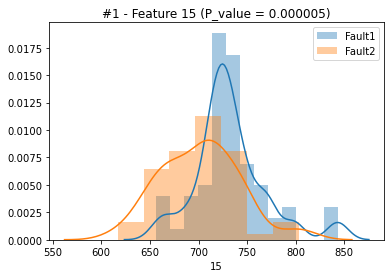

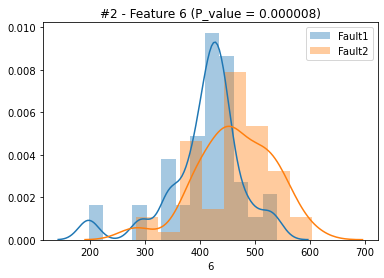

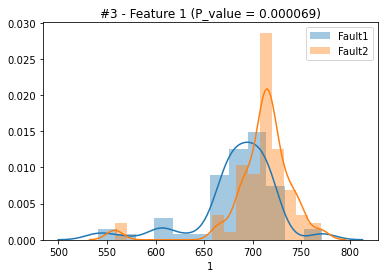

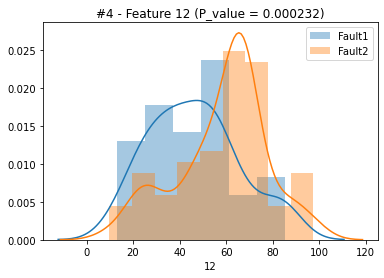

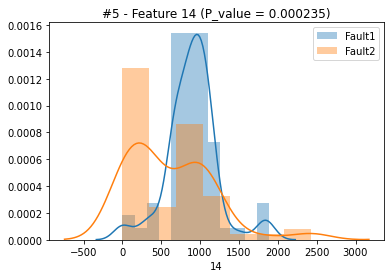

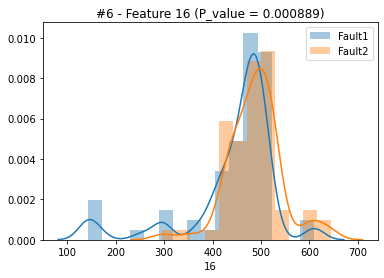

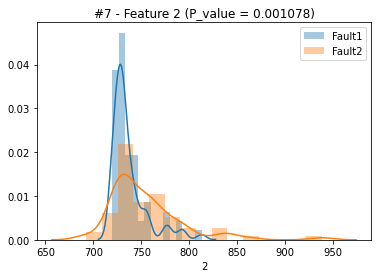

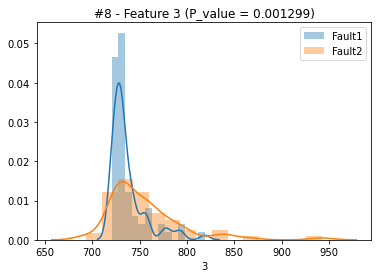

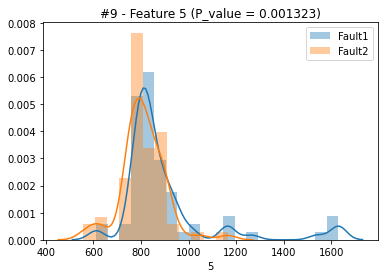

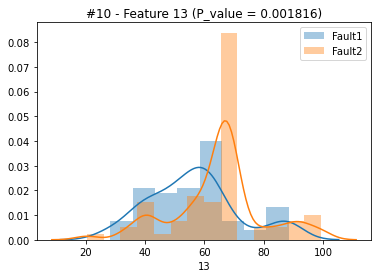

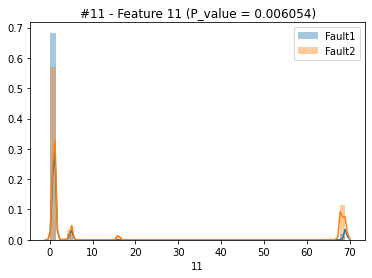

In [54]:
# 확률밀도함수/히스토그램 그래프 확인 코드 작성 (선택)
for i in range(Good_Feature_Count):
    sb.distplot(FeatureData_Fault1_df.iloc[int(P_value_Rank.iloc[i,0]), :], label = 'Fault1')
    sb.distplot(FeatureData_Fault2_df.iloc[int(P_value_Rank.iloc[i,0]), :], label = 'Fault2')
    plt.title('#{} - Feature {} (P_value = {:.6f})'.format(i+1, int(P_value_Rank.iloc[i,0]), P_value_Rank.iloc[i,1]))
    plt.legend(loc='upper right')
    plt.show()
    

.

.

.



### 최종 선택된 특징데이터 인덱싱


#### [필수] 추출 후 특징데이터 (총 1개) 이름(변수명) : 
- FeatureSelected

In [58]:
# P-value < 0.01인 특징개수 입력
# Good_Feature_Count = 11
Rank = Good_Feature_Count

FeatureSelected_Fault1 = np.zeros((Rank,NoOfData))
FeatureSelected_Fault2 = np.zeros((Rank,NoOfData))


# 특징 선택 코드 작성 
for i in range(Rank):
    index = int(P_value_Rank.iloc[i, 0])
    FeatureSelected_Fault1[i, :] = FeatureData_Fault2_df.iloc[index, :].values
    FeatureSelected_Fault2[i, :] = FeatureData_Fault2_df.iloc[index, :].values
    
FeatureSelected = pd.DataFrame(np.concatenate([FeatureSelected_Fault1, FeatureSelected_Fault2] , axis=1)) # 고장 1,2 데이터 합치기 

print(FeatureSelected.shape)  # (Rank,140)이 맞는지 확인

(11, 140)


.

.

.



### 4단계 결과물 체출용 데이터 파일로 저장 (수강생 번호 외 코드수정X)

- 위에서 데이터 이름(변수명) 가이드에 맞게 지정됐는지 재확인 요망

In [59]:
# StudentNo = 98   # 수강생 번호 입력

Path = './Result/ST%d_DC4'%StudentNo

FeatureSelected.to_csv( Path , sep=',' , header=None , index=None)

.

.

.



# * 결과 데이터(DC1~4) 및 본 코드파일 함께 zip파일로 압축하여 제출

### >>> 압축파일 이름 ST(수강생 번호)_DC (예시 : 'ST000_DC.zip'  //  'ST00_DC.zip'  //  'ST0_DC.zip')

.

.

.



.

.

.



화이팅